## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df_rows = len(df)
print(df_rows)

294478


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.sum()/df_rows

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df_newpage_control = df.query("landing_page == 'new_page' & group == 'control'")
df_oldpage_treatment = df.query("landing_page == 'old_page' & group == 'treatment'")

# adding lengths of both mismatches
nomatch_length = len(df_newpage_control) + len(df_oldpage_treatment)

# creating a single dataframe for both mismatches
nomatch = pd.concat([df_newpage_control , df_oldpage_treatment ])


nomatch_length


3893

f. Do any of the rows have missing values?

In [7]:
df.info()

# since the output of .info() function doesn't shows any missing enties in any of the columns,therefore there are null missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# indexing the mismatched rows and then dropping them
nomatch_index = nomatch.index
df2 = df.drop(nomatch_index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# calculating unique user_ids
len(df2.user_id.unique())

# checking for duplicate entries in df2
len(df2) - len(df2.user_id.unique())

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# find duplicate user
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# dropping duplicate user_ids
df2.drop(labels = 1899 , axis = 0 , inplace = True)

# checking whether .drop() function worked or not
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# calculating the probability
print("the probability of an individual converting regardless of the page they received is : " , df2['converted'].mean())

the probability of an individual converting regardless of the page they received is :  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# calculating the probability"
print("the probability of  converting of a control group individual :" , df2[df2['group'] == 'control']['converted'].mean())

the probability of  converting of a control group individual : 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# calculating the probability
print("the probability of  converting of a treatment group individual :" , df2[df2['group'] == 'treatment']['converted'].mean())

the probability of  converting of a treatment group individual : 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
print(" the probability that an individual received the new page :" , len(df2.query("landing_page == 'new_page'"))/len(df2))

 the probability that an individual received the new page : 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

According to the results we got,the control group converted at a higher rate then the treatment group. However, there is a very small difference between the two groups i.e ~0.2%

since the data in question 4 shows that the probability an individual received a new page is 0.5, means that it is not possible for there to be a difference in conversion based on giving more oppurtunities to do so



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

i NULL HYPOTHESIS:
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0

i.e the difference b/w the population conversion rate will be either equal to 0(no change) or less then 0(the old page has a higher conversion rate)

ii ALTERNATIVE HYPOTHESIS:
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0

i.e the difference b/q the population conversion rate will be greater then 0(the new page has a higher conversion rate)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [18]:
# calculate probability of conversion for new page
prob_new = df2[df2["landing_page"] == 'new_page']['converted'].mean()
print("probability of conversion for new page :" , prob_new )

probability of conversion for new page : 0.11880806551510564


In [19]:
# calculate probability of conversion for old page
prob_old = df2[df2["landing_page"] == 'old_page']['converted'].mean()
print("calculate probability of conversion for old page :" , prob_old)

calculate probability of conversion for old page : 0.1203863045004612


In [20]:
# first we will take mean of the above two probabilities
prob_mean = np.mean([prob_new , prob_old])
print("probability of conversion under null hypothesis(prob_mean) :" , prob_mean)

probability of conversion under null hypothesis(prob_mean) : 0.11959718500778342


In [21]:
# calculate differences in probability of conversion for new and old page(not under null hypothesis)
prob_diff = prob_new - prob_old
print("differences in probability of conversion for new and old page(not under null hypothesis :" , prob_diff)

differences in probability of conversion for new and old page(not under null hypothesis : -0.0015782389853555567


Hence:
pnew = 0.1188

pold = 0.1204

a. what is the convert rate for pnew under null?
pmean = prob_mean = 0.1195

b. what is the convert rate for pold under null?
pnew - pold = prob_new - prob_old = 0

In [22]:
# calculate the n_new and n_old
n_new , n_old = df2['landing_page'].value_counts()
print("n_new :" , n_new , "\nn_old :" , n_old)

n_new : 145310 
n_old : 145274


c. what is nnew?
145310

d. What is $n_{old}$?
145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# simulatng conversion rates under null hypothesis
new_converted = np.random.choice([1 , 0] , size = n_new , p=[prob_mean , (1 - prob_mean)])
new_converted.mean()

0.11928291239419173

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# simulating conversion rates under null hypothesis
old_converted = np.random.choice([1 , 0] , size = n_old , p=[prob_mean , (1 - prob_mean)])
old_converted.mean()


0.11951209438715805

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# calculate difference in p under null hypothesis
new_converted.mean() - old_converted.mean()

-0.00022918199296632913

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [26]:
p_diffs = []
# simulating 10000 times
for i in range(10000):
    new_converted = np.random.choice([1 , 0] , size = n_new , p=[prob_mean , (1 - prob_mean)])
    old_converted = np.random.choice([1 , 0] , size = n_old , p=[prob_mean , (1 - prob_mean)])
    p_diff = new_converted.mean() - old_converted.mean()
    p_diffs.append(p_diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

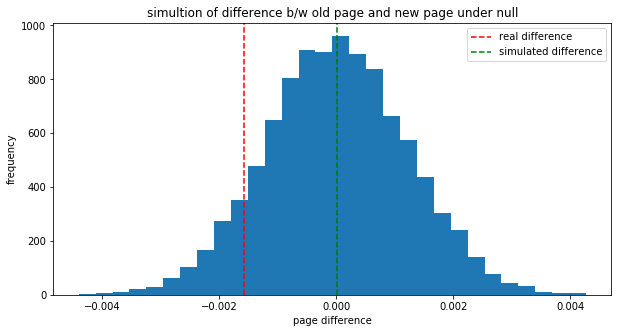

In [27]:
# plotting histogrammes
plt.figure(figsize = (10 , 5))
plt.hist(p_diffs , bins = 30)
plt.title("simultion of difference b/w old page and new page under null")
plt.xlabel("page difference")
plt.ylabel("frequency")
plt.axvline(x = (prob_new-prob_old) , color = 'r' , linestyle = 'dashed' , label = 'real difference')
plt.axvline(x = (np.array(p_diffs).mean()), color = 'g' , linestyle = 'dashed' , label = 'simulated difference')
plt.legend()
plt.show()

# the graph generated shows a normal distribution with a mean of 0,which is what the data should look like under null hypothesis

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_diff = prob_new - prob_old
# proportion of p_diffs greater than actual difference
greater_than_actual = [i for i in p_diffs if i>p_diff]

# calculating the actual values
print("actual_difference :" , p_diff)
proportion_greater_than_actual = len(greater_than_actual)/len(p_diffs)
print("proporton which is greater than actual is :", proportion_greater_than_actual)

actual_difference : -0.0015782389853555567
proporton which is greater than actual is : 0.9057


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We calculated that almost 90.86 percent of our population in the simulation lies above the actual difference which suggests that the new page does not performs significantely better than the old page. Infact, the performance might be even worse

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm
# calculate number of conversions
convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])
print("convert_old :" , convert_old , "\nconvert_new :" , convert_new , "\nn_old :" , n_old , "\nn_new :" , n_new)

convert_old : 17489 
convert_new : 17264 
n_old : 145274 
n_new : 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
# find z-score & p-value
z_score , p_value = sm.stats.proportions_ztest(count = [convert_new , convert_old] , nobs = [n_new , n_old])
print("z-score :" , z_score , "\np_value :" , p_value)


z-score : -1.3109241984234394 
p_value : 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

a z-score, in layman terms is the number of standard deviations from the mean a data point is i.e how many standard deviations below or above the popuulation mean raw score is.

the z-score shows that the difference b/w the line in the histogramme is -1.31 standard deviations. this value is about ~18.5 percent which is probabily due to a random chance. Thus we don't have enough evidence to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

we can probably use a logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = pd.Series(np.zeros(len(df2)) , index = df2.index)
df2['ab_page'] = pd.Series(np.zeros(len(df2)) , index = df2.index )

# indexes which need to be changed
to_change = df2[df2['group'] == 'treatment'].index

# changing values
df2.set_value(index = to_change , col = 'ab_page' , value = 1)
df2.set_value(index = df2.index , col = 'intercept' , value = 1)

# changing datatype
df2[['intercept' , 'ab_page']] = df2[['intercept' , 'ab_page']].astype(int)

# move converted to right hand side
df2 = df2[['user_id' , 'timestamp' , 'group' , 'landing_page' , 'ab_page' , 'intercept' , 'converted']]

# checking for confirming the changes
df2[df2['group'] == 'treatment'].head()



C:\Users\maste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\maste\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
# setting up logistic regression
logistic = sm.Logit(df2['converted'] , df2[['ab_page' , 'intercept']])

# calculating results
Results = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
Results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2018-11-12 19:21 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

it looks like that the p-value associated with the ab_page is 0.1899 which is slightly lower than the p-value we calculated using the z-test above. This is because we have added an intercept which accounts for any error, thereby making this value more accurate. Still, this p-value is much higher to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

there are certainly some disadvantages of adding too many factors into refgression model. in this case we want to have features which have larger impacts on the outcome since small impacts are not influential and are better left for the intercept.

However, only 1 feature was chosen to determine whether the user would convert so a couple of extra features won't hurt.for example, time spent looking at a page by a customer can be an interesting feature to add. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# importing data
countries = pd.read_csv('countries.csv')
countries.head()

# creating dummy variables
df_dummy = pd.get_dummies(data = countries, columns=['country'])

# Performing join
df3 = df_dummy.merge(df2, on='user_id')

# Sorting columns
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

# Fix Data Types
df3[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df3[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df3.head()


,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [35]:
# Create logit_countries object
countries2 = sm.Logit(df3['converted'], 
                           df3[['country_UK', 'country_US', 'intercept']])
# Fit
results2 = countries2.fit()
results2.summary2()

# IT SEEMS THAT COUNTRY DID HAVE SOME EFFECT ON THE CONVERSION RATE, BUT NOT HIGH ENOUGH TO BE STATISTICALLY CORRECT.

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2018-11-12 19:21 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:

# Create logit_countries object
countries3 = sm.Logit(df3['converted'], 
                           df3[['ab_page', 'country_UK', 'country_US', 'intercept']])
# Fit
results3 = countries3.fit()


results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2018-11-12 19:21 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
==================================================================

"""


# When adding everything together it seems that the p-values for all featues has increased. The z-score for the intercept is incredibly large though which is interesting.


# Conclusions
Although it would seem from the outset that there is a difference between the conversion rates of new and old pages, there is just not enough evidence to reject the null hypothesis. From the histogram shown in this report, it seems that the new page does worse than the old page.

It was also found that this was not dependent on countries with conversion rates being roughly the same in the UK as in the US. The test conditions were fairly good as well, users had a roughly 50% chance to recieve the new and old pages and the sample size of the initial dataframe is sufficiently big such that collecting data is likely not a good use of resources.

We would recommend that the e-commerce company spend their money on trying to improve their website before trying again. Have a look into the reasons of why the page performed so poorly.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0